In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')

In [28]:
adv = pd.read_csv('advertising.csv')

In [29]:
adv.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [30]:
adv.drop('Unnamed: 0',axis = 1, inplace = True)

In [31]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [32]:
adv.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [33]:
# there is no null values in the dataset

In [34]:
adv.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [35]:
# mean is almost equal to median for almost every variable but a little difference in newspaper column.
# we check the skewness

In [36]:
adv.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

<AxesSubplot:ylabel='Density'>

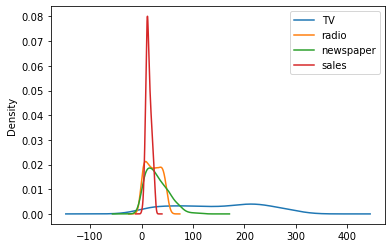

In [37]:
adv.plot.kde()

In [38]:
# minute skewness is present in the newspaper column
# data is very much spreaded in TV column

<AxesSubplot:>

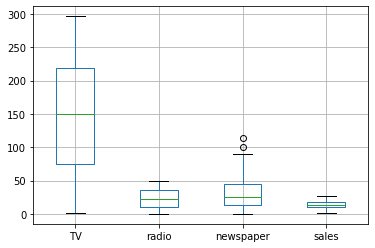

In [39]:
adv.boxplot()

In [40]:
# we can see the outliers can be detected in newspaper column

In [41]:
from scipy.stats import zscore
z = np.abs(zscore(adv))
z

array([[9.69852266e-01, 9.81522472e-01, 1.77894547e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 6.69578760e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.78354865e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.28640506e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.28180188e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 2.04592999e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 3.24708413e-01, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 8.72486994e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 1.36042422e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 4.30581584e-01, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 2.92486143e-01, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.22232878e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.62704048e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.07502697e

In [42]:
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [43]:
z[16][2]

3.8411707150992718

In [44]:
z[101][2]

3.238153957342154

In [49]:
adv = adv[(z<3).all(axis=1)]

<AxesSubplot:>

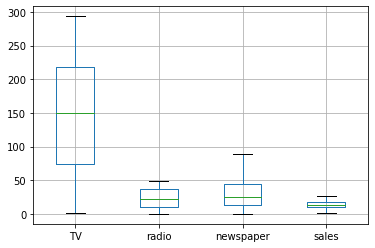

In [51]:
adv.boxplot()

In [53]:
# outliers removed
# lets check the correlation

In [54]:
adv.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.051978,0.049771,0.779121
radio,0.051978,1.000000,0.346364,0.576748
newspaper,0.049771,0.346364,1.000000,0.219555
sales,0.779121,0.576748,0.219555,1.000000


<AxesSubplot:>

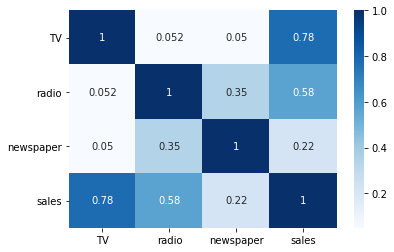

In [71]:
sns.heatmap(adv.corr(), annot = True, cmap = 'Blues')

radio and newspaper column have a negative correlation with the TV column
but the sales column dont have much neagative correlation

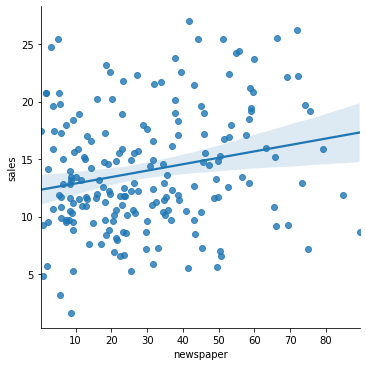

In [56]:
sns.lmplot(x='newspaper', y='sales', data = adv)

slight positive correlation

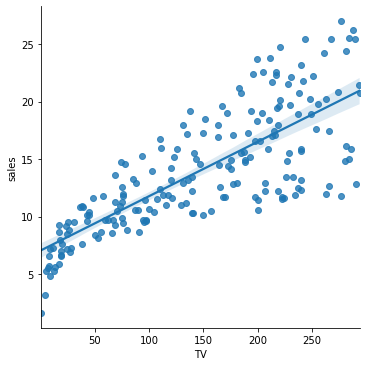

In [57]:
sns.lmplot(x='TV', y='sales', data = adv)

good positive correlation

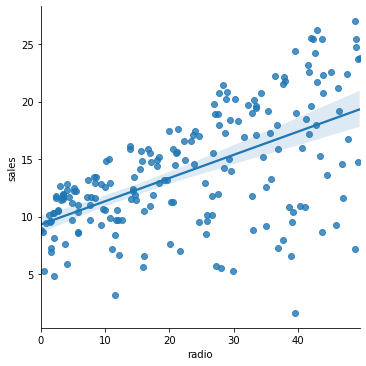

In [58]:
sns.lmplot(x='radio', y='sales', data = adv)

positive correlation

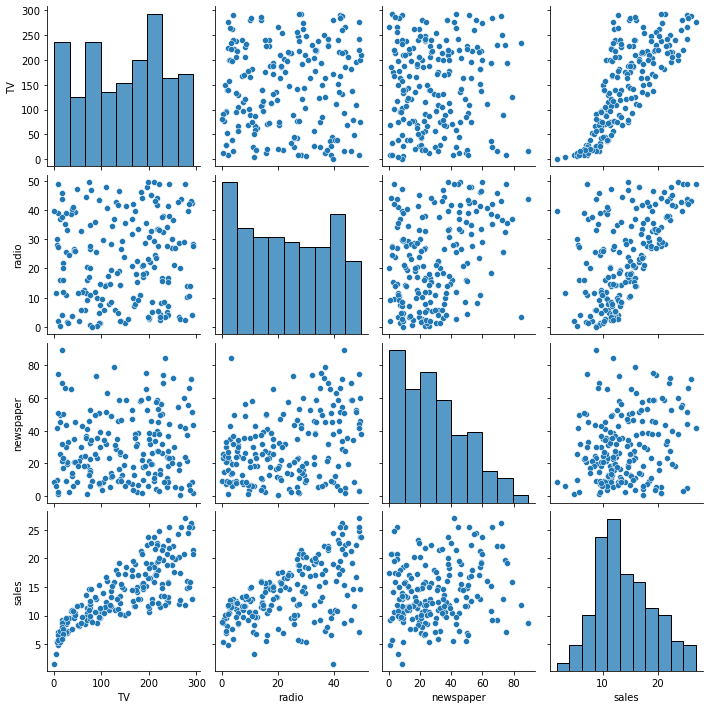

In [59]:
sns.pairplot(adv)

In [60]:
# from this its clearly seen that sales can be at higher pace when we use the TV channel for advertising

In [ ]:
# we would like to consider TV as our faviourite channel for sales, then 

In [96]:
x = adv['TV']
x = x.to_numpy().reshape(-1,1)
x.shape

(198, 1)

In [97]:
y = adv['sales']
y = y.to_numpy().reshape(-1,1)
y.shape

(198, 1)

In [127]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .3, random_state = 45)

In [128]:
 l = [x_train, x_test, y_train, y_test]
for i in l:
    print(i.shape)

(138, 1)
(60, 1)
(138, 1)
(60, 1)


In [129]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.5986654072417957

In [130]:
predlr = lr.predict(x_test)

In [131]:
lr.coef_

array([[0.04791181]])

In [132]:
lr.intercept_

array([6.91127374])

In [133]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [134]:
print(r2_score(predlr,y_test))

0.4216788487173009


In [135]:
print(mean_absolute_error(predlr,y_test))

2.4760501119625995


In [136]:
print(mean_squared_error(predlr,y_test))

10.131234348774727


In [137]:
rmse = mean_squared_error(predlr,y_test)
rmse*0.5

5.065617174387364

In [159]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
ls = Lasso(alpha = 0.1)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.5986653537646847

In [160]:
rd = Ridge(alpha=0.1)
# rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.5986654072417894

In [161]:
enr = ElasticNet(alpha = 0.0001)
enr.fit(x_train,y_train)
print(enr.score(x_train,y_train))

0.5986654072417812


In [162]:
from sklearn.svm import SVR

kernellist = ['linear','poly','rbf']
for i in kernellist:
    svr=SVR(kernel = i)
    svr.fit(x_train,y_train)
    print(svr.score(x_train,y_train))

0.5963057933151958
0.4063642689432224
0.5880193361960294


In [182]:
from sklearn.model_selection import cross_val_score
model_list = [lr,ls,rd,enr]


for m in model_list:
    cv = cross_val_score(m,x,y,cv=5)
    print(m)
    print(cv)
    print('mean cv value: ', round(cv.mean(),2))
    print('std is:', cv.std())
    print('\n')

LinearRegression()
[0.60201798 0.68435212 0.55488424 0.63163363 0.475684  ]
mean cv value:  0.59
std is: 0.07082509566994796


Lasso(alpha=0.1)
[0.60205988 0.68428071 0.55490883 0.63161273 0.47574006]
mean cv value:  0.59
std is: 0.07078452522172182


Ridge(alpha=0.1)
[0.60201799 0.6843521  0.55488425 0.63163363 0.47568402]
mean cv value:  0.59
std is: 0.07082508366019208


ElasticNet(alpha=0.0001)
[0.602018   0.68435209 0.55488425 0.63163362 0.47568403]
mean cv value:  0.59
std is: 0.07082507442945762




In [186]:
predls = ls.predict(x_test)
predrd = rd.predict(x_test)
predenr = enr.predict(x_test)

print(ls)
print('R2 SCORE:', r2_score(predls,y_test))
print('MSE:', mean_squared_error(predls,y_test))
print()

print(rd)
print('R2 SCORE:', r2_score(predrd,y_test))
print('MSE:', mean_squared_error(predrd,y_test))
print()

print(enr)
print('R2 SCORE:', r2_score(predenr,y_test))
print('MSE:', mean_squared_error(predenr,y_test))

Lasso(alpha=0.1)
R2 SCORE: 0.421352367606071
MSE: 10.130895269617643

Ridge(alpha=0.1)
R2 SCORE: 0.42167873544972057
MSE: 10.131234230479475

ElasticNet(alpha=0.0001)
R2 SCORE: 0.42167867777994084
MSE: 10.131234170250051


In [188]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
print ('MODEL SCORE:', rfr.score(x_train,y_train))
predrfr = rfr.predict(x_test)

print('Model Report')
print('MSE: ', mean_squared_error(predrfr,y_test))
print('R2 SCORE:', r2_score(predrfr,y_test))
cv=cross_val_score(rfr, x, y, cv=5)
print(cv)
print('CV SCORE: ', cv.mean())

MODEL SCORE: 0.9216524894978
Model Report
MSE:  17.62331591504955
R2 SCORE: 0.05108638573743518
[0.36858988 0.36987251 0.43994557 0.46988985 0.38512475]
CV SCORE:  0.40668451341163864


In [189]:
from sklearn.tree import ExtraTreeRegressor, DecisionTreeRegressor
et = ExtraTreeRegressor()
et.fit(x_train,y_train)
print ('MODEL SCORE:', et.score(x_train,y_train))
predet = et.predict(x_test)

print('Model Report')
print('MSE: ', mean_squared_error(predet,y_test))
print('R2 SCORE:', r2_score(predet,y_test))
cv=cross_val_score(et, x, y, cv=5)
print(cv)
print('CV SCORE: ', cv.mean())

MODEL SCORE: 0.988939900115418
Model Report
MSE:  21.478166666666663
R2 SCORE: 0.23567388974054115
[0.32046852 0.27826625 0.24125608 0.33577442 0.37228331]
CV SCORE:  0.30960971779183144


# saving the best model

In [190]:
import joblib
joblib.dump(lr,'lrfile.obj')

['lrfile.obj']